## Environment Data first tests
Duncan Cameron-Steinke

First published Aug 21, 2018
Last updated Aug 24, 2018

Printing a random sampling of 5 rows in order to see what the data looks like

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
raw_data = pd.read_csv(r"C:\Users\Duncan C-S\Documents\Environmental Data Science Challenge\Raw_data\NFA 2018.csv")
raw_data.sample(5)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
51037,Mozambique,MOZ,Africa,Eastern Africa,1969,EFImportsTotGHA,2.335352e+05,2.190138e+04,3.671543e+04,6.104417e+04,0.0000,4.896997e+04,4.021661e+05,NaN,9059000
26760,Gabon,GAB,Africa,Middle Africa,1982,BiocapPerCap,NaN,NaN,NaN,NaN,NaN,NaN,5.603741e+01,11755.30,767000
421,Afghanistan,AFG,Asia,Southern Asia,1980,BiocapTotGHA,5.181495e+06,6.110995e+06,6.167106e+05,0.000000e+00,389799.1637,0.000000e+00,1.229900e+07,NaN,13211000
53515,Netherlands,NLD,Europe,Western Europe,2012,EFExportsTotGHA,4.214083e+07,3.266465e+06,1.372751e+07,6.221449e+06,0.0000,1.266442e+08,1.920005e+08,50213.00,16749000
72791,Turkmenistan,TKM,Asia,Central Asia,1996,BiocapTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,1.326644e+07,2151.27,4268000


The above dataset details the carbonfootprint of 192 countries in 9 catagoriers across 52 years. In total there are 87,020 rows of data in 15 catagories, representing 1.3 million data points.

Before prediction can begin, the data needs to be assed and organised.
step 1:
## Want to chose rational time frame

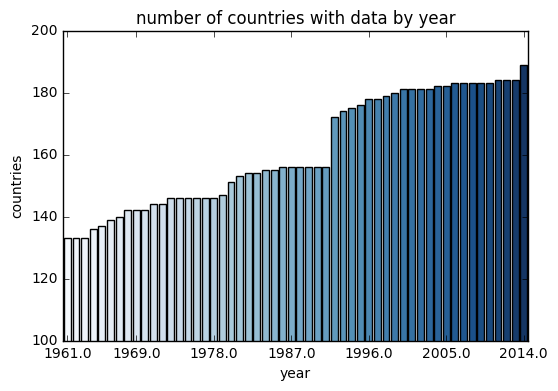

Plotting the total number of countries with data available for each given year


In [15]:
countries = raw_data['country'].unique()
years = raw_data['year'].unique()
years = np.sort(years)

barplot = pd.DataFrame(columns=["year","countries"])
for yr in years:
    temp = raw_data[raw_data.year == yr]
    N = len(temp.country.unique())
    year = pd.Timestamp(yr,1,1)
    year = yr
    barplot = barplot.append(pd.DataFrame([[year, N]], columns=["year","countries"]), ignore_index=True)
    
sns.barplot(x='year', y='countries', data = barplot, palette = 'Blues')
plt.ylim(100,200)
plt.title("number of countries with data by year")
ticks = [0,8,17,26,35, 44, 53]
year_of_ticks = barplot.iloc[ticks]['year']
plt.xticks(ticks, year_of_ticks)
plt.show()
print("Plotting the total number of countries with data available for each given year")

### The above barplot shows that there are just over 130 countries that have data between the years of 1961 to 2014. There is a large increase in data collection occuring in 1992 when the number of countries with data goes from 155 to 175. 

## Next the *quality of data* is analysed as a function of country and UN_subregion

C:\Users\Duncan C-S\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


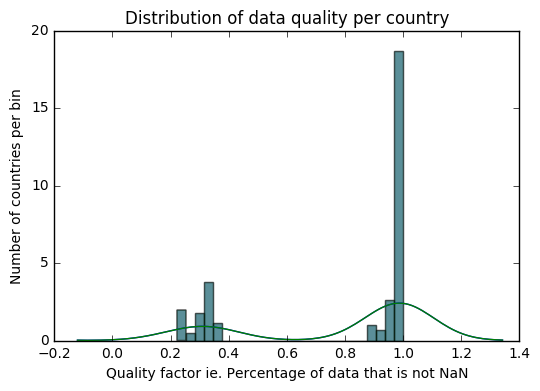

The following plot indicates that there is a bimodal distribution in the quality of data per country


In [17]:
countryData = pd.DataFrame(columns=["country","UN_subregion", "quality", "years"])
for country in countries:
    temp = raw_data.loc[raw_data['country'] == country]
    counts = temp.count()
    Q_prct = counts[['crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'total', 'Percapita GDP (2010 USD)',
       'population']].sum()/(counts['country']*9)
    years = len(temp["year"].unique())
    subreg = temp.iloc[0]['UN_subregion']
    countryData = countryData.append(pd.DataFrame([[country, subreg, Q_prct, years]], columns=["country", "UN_subregion", "quality", "years"]), ignore_index=True)

countryData["years"] = pd.to_numeric(countryData["years"])
sns.distplot(countryData['quality'], bins =25)
plt.xlabel("Quality factor ie. Percentage of data that is not NaN")
plt.ylabel("Number of countries per bin")
plt.title("Distribution of data quality per country")
plt.show()
print("The following plot indicates that there is a bimodal distribution in the quality of data per country. with ")

### The above distribution curve shows that the data quality is extremly bi-modal. Either nearly all the data for a given country is available in which case the quality factor exceeds 80%. Or more then half the data for that country is missing and the quality factor is less then 50%.

# Want to examine the reason for the bi-modal distribution. Is it based on UN_subregion? number of years for which data is collected? or based on type of record collected?

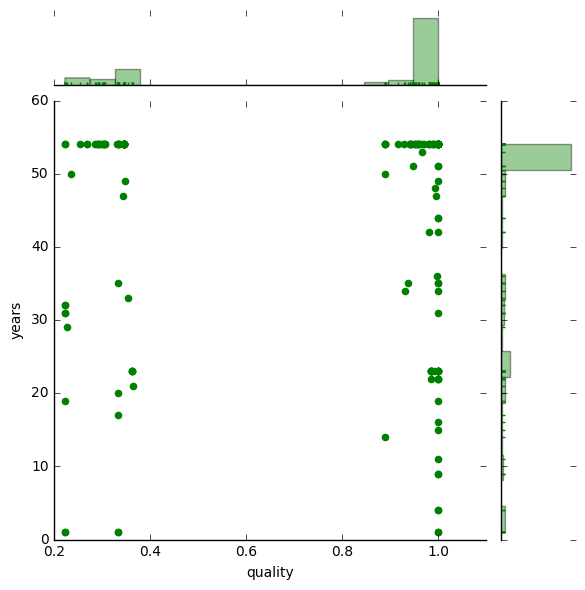

C:\Users\Duncan C-S\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


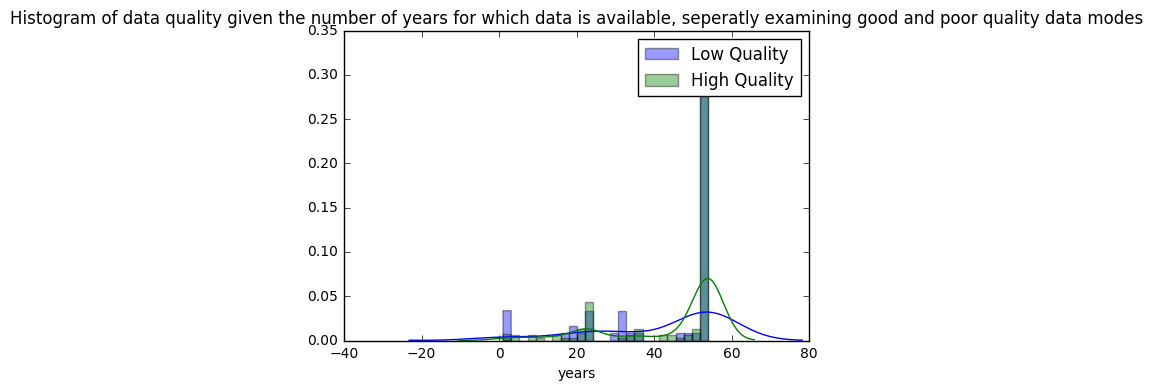

In [19]:
sns.jointplot("quality", 'years', data = countryData, kind="scatter", color="g" , marginal_kws=dict(bins=15, rug=True))
#plt.title("Distribution plot of data quality and quantity")
plt.show()
lowQ_data = countryData[countryData.quality < 0.5]
highQ_data = countryData[countryData.quality >= 0.5]
sns.distplot(lowQ_data['years'], bins =25)
sns.distplot(highQ_data['years'], bins =25)
plt.legend(["Low Quality", "High Quality"])
plt.title("Histogram of data quality given the number of years for which data is available, seperatly examining good and poor quality data modes")
plt.show()

### The above plot shows that there does not exist a corelation between quality of data and number of years in which data is available. This can be seen from the the fact that both the high and low quality modes have similar distribution curves.
### * Having low quality data does not indicate you have less data available 
### * Having many years of available data does not indicate that the quality of data will be better
## Will removing the bad quality data effect the information on UN subregions?

In [40]:
UNsubregions = countryData.UN_subregion.unique()
UNSubregionData = pd.DataFrame()
highQ_data = countryData[countryData.quality >= 0.5]
for region in UNsubregions:
    Temp = countryData[countryData.UN_subregion == region]
    Avg_Q = Temp.quality.mean()
    Avg_y = Temp.years.mean()
    country_count = len(Temp.country.unique())
    
    TempHighQ = highQ_data[countryData.UN_subregion == region]
    High_Avg_Q = TempHighQ.quality.mean()
    High_Avg_y = TempHighQ.years.mean()
    High_country_count = len(TempHighQ.country.unique())
    change = (country_count - High_country_count)/country_count*100
    UNSubregionData = UNSubregionData.append([[region, country_count, Avg_Q, Avg_y, High_country_count, change, High_Avg_Q, High_Avg_y]], ignore_index=True)

UNSubregionData.columns = ["UN_subregion","country count", "Avg_quality", "Avg_years","Country count after clean","%Delta", "Avg_quality after clean", 'Avg_years after clean']
UNSubregionData[UNSubregionData["country count"] != UNSubregionData["Country count after clean"]].sort_values("%Delta", ascending = False).head(8)


C:\Users\Duncan C-S\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,UN_subregion,country count,Avg_quality,Avg_years,Country count after clean,%Delta,Avg_quality after clean,Avg_years after clean
19,Micronesia,2,0.333333,10.500000,0,100.000000,NaN,NaN
16,Polynesia,4,0.260021,39.750000,0,100.000000,NaN,NaN
10,Southern Africa,5,0.468398,50.600000,1,80.000000,1.000000,49.000000
18,Melanesia,3,0.559671,36.333333,1,66.666667,1.000000,54.000000
20,Central Asia,5,0.617391,23.000000,2,60.000000,1.000000,23.000000
5,Caribbean,16,0.577914,42.812500,7,56.250000,0.957966,52.571429
13,Eastern Europe,12,0.688622,34.583333,7,41.666667,0.980881,31.571429
3,Northern Africa,8,0.728304,38.500000,5,37.500000,0.962406,29.200000


### It can be seen from the above table that the subregions most affected by removing countries with poor data would be Micronesia and Polynesia, where both lose all of their data. The next most affected regions are Southern Africa and Melanesia which lose 2/3 of their data. Despite significant loss in data by those 4 regions, the overall effect on the majority of other subregions is to significantly improve average data quality whithout compromising the number of countries within those regions.
### Major conclusions:
* Removing countries with low-quality data well bost average quality to >95%
* a small number of UN subregions will lose all their data